In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">03_비지도학습_군집화</font></b>

# 1. 데이터 생성
 - 남,여 키와 몸무게 데이터를 군집화

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
random.randint(140, 195)

149

In [11]:
data=[]
for i in range(50):
    #여자 데이터 data추가
    data.append([random.randint(42,75), random.randint(145, 175)])
    #남자 데이터 data추가
    data.append([random.randint(60,95), random.randint(160, 195)])
data

[[68, 147],
 [88, 172],
 [43, 161],
 [90, 171],
 [46, 169],
 [75, 182],
 [60, 164],
 [68, 174],
 [54, 175],
 [86, 161],
 [43, 170],
 [85, 188],
 [71, 166],
 [64, 163],
 [60, 152],
 [68, 165],
 [57, 160],
 [69, 177],
 [51, 145],
 [88, 193],
 [69, 150],
 [86, 177],
 [53, 148],
 [93, 181],
 [69, 162],
 [94, 190],
 [44, 156],
 [67, 172],
 [43, 172],
 [91, 189],
 [44, 158],
 [69, 181],
 [63, 155],
 [86, 195],
 [44, 153],
 [71, 166],
 [59, 169],
 [67, 161],
 [51, 161],
 [88, 177],
 [65, 155],
 [65, 179],
 [52, 146],
 [70, 164],
 [46, 167],
 [81, 194],
 [43, 160],
 [73, 169],
 [75, 145],
 [66, 176],
 [50, 151],
 [65, 178],
 [67, 168],
 [69, 162],
 [54, 145],
 [74, 181],
 [73, 167],
 [66, 185],
 [53, 175],
 [91, 168],
 [55, 152],
 [60, 188],
 [51, 147],
 [69, 170],
 [69, 173],
 [68, 163],
 [64, 147],
 [91, 169],
 [47, 173],
 [71, 169],
 [61, 160],
 [70, 194],
 [67, 159],
 [87, 182],
 [69, 162],
 [91, 184],
 [52, 161],
 [83, 188],
 [74, 175],
 [82, 172],
 [43, 159],
 [77, 170],
 [50, 170],
 [77

In [14]:
# 여자
#for female in data[::2]:
#    print(female, end=' ')
print('여자 :',[female for female in data[::2]])
print('남자 :',[male for male in data[1::2]])
print('------------------------------------')
print('여자 몸무게(x축) :',[female[0] for female in data[::2]])
print('여자 키(y축) :',[female[1] for female in data[::2]])
print('남자 몸무게(x축) :',[male[0] for male in data[1::2]])
print('남자 키(y축) :',[male[1] for male in data[1::2]])

여자 : [[68, 147], [43, 161], [46, 169], [60, 164], [54, 175], [43, 170], [71, 166], [60, 152], [57, 160], [51, 145], [69, 150], [53, 148], [69, 162], [44, 156], [43, 172], [44, 158], [63, 155], [44, 153], [59, 169], [51, 161], [65, 155], [52, 146], [46, 167], [43, 160], [75, 145], [50, 151], [67, 168], [54, 145], [73, 167], [53, 175], [55, 152], [51, 147], [69, 173], [64, 147], [47, 173], [61, 160], [67, 159], [69, 162], [52, 161], [74, 175], [43, 159], [50, 170], [46, 160], [66, 170], [66, 155], [74, 161], [62, 154], [42, 168], [54, 148], [51, 153]]
남자 : [[88, 172], [90, 171], [75, 182], [68, 174], [86, 161], [85, 188], [64, 163], [68, 165], [69, 177], [88, 193], [86, 177], [93, 181], [94, 190], [67, 172], [91, 189], [69, 181], [86, 195], [71, 166], [67, 161], [88, 177], [65, 179], [70, 164], [81, 194], [73, 169], [66, 176], [65, 178], [69, 162], [74, 181], [66, 185], [91, 168], [60, 188], [69, 170], [68, 163], [91, 169], [71, 169], [70, 194], [87, 182], [91, 184], [83, 188], [82, 172]

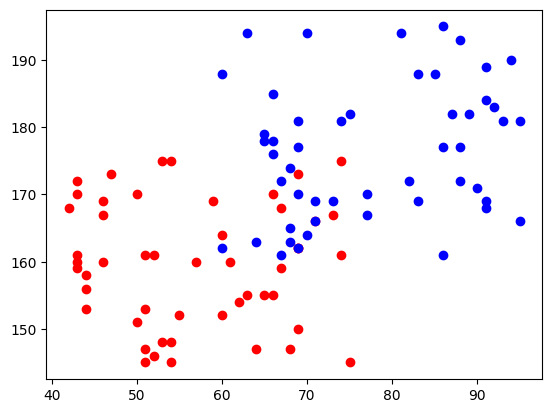

In [21]:
plt.plot([female[0] for female in data[::2]],[female[1] for female in data[::2]],'o',c='r')
plt.plot([male[0] for male in data[1::2]],[male[1] for male in data[1::2]],'o',c='b')
plt.show()

# 2. 군집화 로직

In [20]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(42,75), random.randint(145, 175)],
    [random.randint(60,95), random.randint(160, 195)]
]
random_points

[[75, 146], [90, 167]]

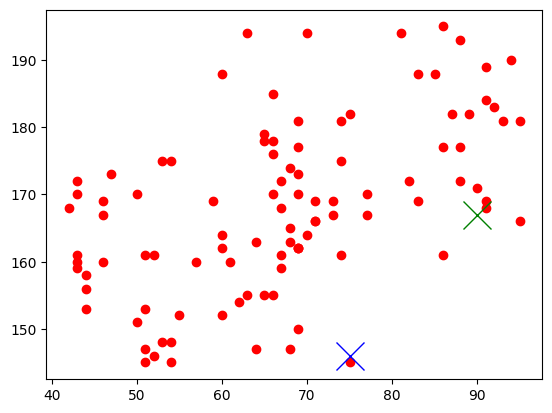

In [38]:
plt.plot([d[0] for d in data],[d[1] for d in data],'o',c='r')
plt.plot( random_points[0][0], random_points[0][1],'x',c='b', markersize='20') #기준점1
plt.plot( random_points[1][0], random_points[1][1],'x',c='g', markersize='20') #기준점2
plt.show()

In [28]:
# 두 점 거리를 return / a : [0,0]
def dist(a, b):
    return np.sqrt( (a[0]-b[0])**2 + (a[1]-b[1])**2 )
dist([3,4], [0,0])

5.0

In [29]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []
for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(51, 49)

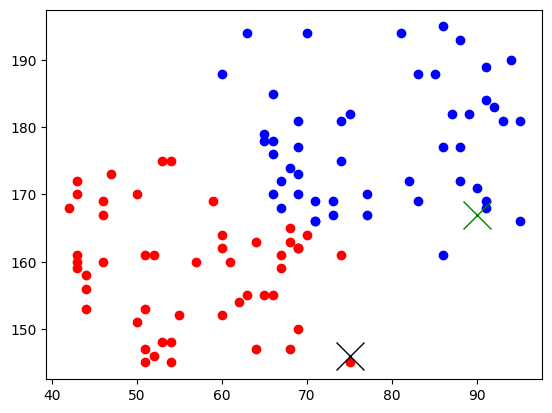

In [37]:
# group0과 group1, 기준점1, 기준점2
plt.plot([d[0] for d in group0],[d[1] for d in group0],'o',c='r')
plt.plot([d[0] for d in group1],[d[1] for d in group1],'o',c='b')
plt.plot( random_points[0][0], random_points[0][1],'x',c='k', markersize='20') #기준점1
plt.plot( random_points[1][0], random_points[1][1],'x',c='g', markersize='20') #기준점2
plt.show()

In [39]:
# 기준점 이동 : group0의 중심점(기준점1), group1의 중심점(기준점2)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]

random_points

[[56.450980392156865, 158.8235294117647],
 [78.28571428571429, 177.57142857142858]]

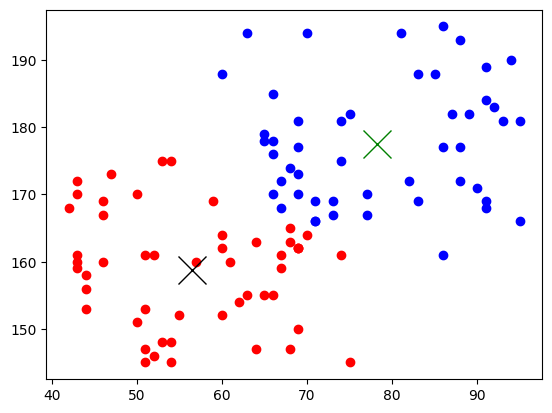

In [40]:
# group0과 group1, 기준점1, 기준점2
plt.plot([d[0] for d in group0],[d[1] for d in group0],'o',c='r')
plt.plot([d[0] for d in group1],[d[1] for d in group1],'o',c='b')
plt.plot( random_points[0][0], random_points[0][1],'x',c='k', markersize='20') #기준점1
plt.plot( random_points[1][0], random_points[1][1],'x',c='g', markersize='20') #기준점2
plt.show()

# 3. 군집화 전체 코드(for문 이용)
 - 랜덤포인트 2개 지정
 - for문
     * 랜덤포인트 2지점 기준으로 group0과 group1나눔
     * 랜덤포인트 출력
     * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트

초기 기준점 : [[68, 168], [71, 171]]
1 번째 points : [[57.345454545454544, 159.45454545454547], [79.13333333333334, 178.46666666666667]]
2 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
3 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
4 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
5 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
6 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
7 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
8 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]
9 번째 points : [[56.83018867924528, 159.20754716981133], [78.7872340425532, 177.93617021276594]]


(140.0, 195.0)

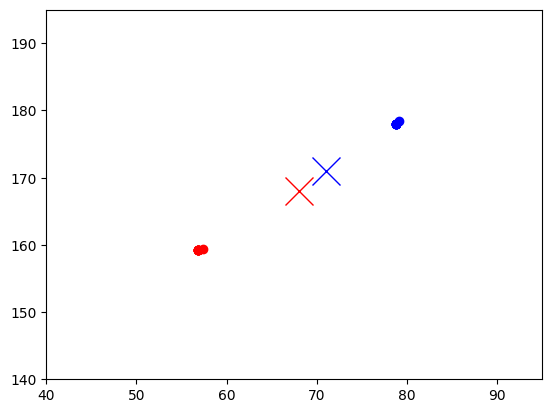

In [41]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
plt.xlim([40,95])
plt.ylim([140,195])

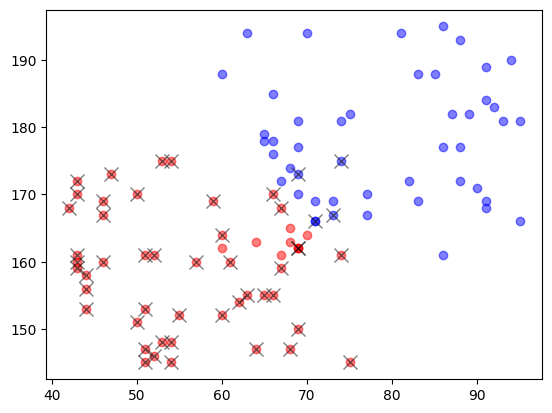

In [44]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)
plt.show()

# 4. api(sklearn)를 이용한 군집화
 - sklearn : 머신러닝 패키지
     * 예측모델 : 분류, 회귀, 군집분석 - fit(학습), predict(예측 -군집은 없음)
     * 변환모델 : 전처리시 사용 ex. 인코딩, 스케일조정 - fit(학습), transform(변환함수), fit_transform(학->변)

In [ ]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
# import os
# os.environ['OMP_NUM_THREADS'] = '1'

In [45]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10,     # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)

KMeans(init='random', n_clusters=2, n_init=10, random_state=7)

In [49]:
# 기준점(중심점)
model.cluster_centers_

array([[ 78.6875    , 177.58333333],
       [ 56.5       , 159.17307692]])

In [46]:
# 나눠진 그룹들의 인덱스
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [47]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]

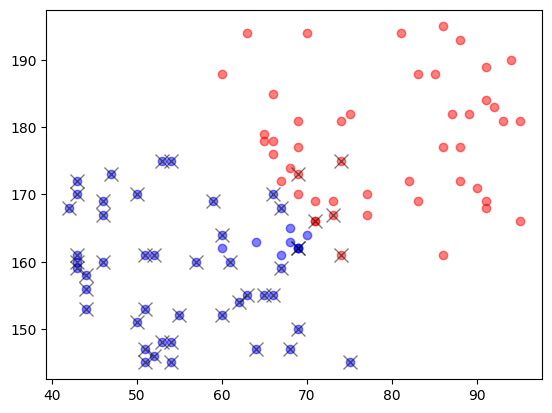

In [48]:
plt.plot([d[0] for d in group0],
         [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
         [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
         [d[1] for d in data[::2]], 'x', color='k', alpha=0.5, markersize=10)
plt.show()